<a href="https://colab.research.google.com/github/oeuiaa/AI-Assisted-Password-Strength-Assessor/blob/main/Perbandingan_AI_Model_Password_Strength_Assessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv',error_bad_lines = False)
df.dropna(inplace = True)

Saving data.csv to data.csv


<ipython-input-4-1cba445dcb08>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data.csv',error_bad_lines = False)
Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


SGD Classifier Metrics:
Accuracy: 0.7431
Precision: 0.5522
Recall: 0.7431
F1 Score: 0.6336
ROC AUC: 0.5272

Logistic Regression Metrics:
Accuracy: 0.7431
Precision: 0.5522
Recall: 0.7431
F1 Score: 0.6336
ROC AUC: 0.5278

Naive Bayes Metrics:
Accuracy: 0.7430
Precision: 0.5522
Recall: 0.7430
F1 Score: 0.6335
ROC AUC: 0.5443

Passive Aggressive Classifier Metrics:
Accuracy: 0.7431
Precision: 0.5522
Recall: 0.7431
F1 Score: 0.6336
ROC AUC: 0.5444




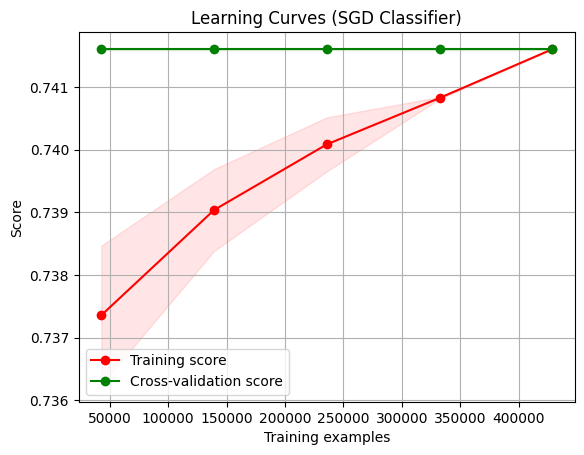

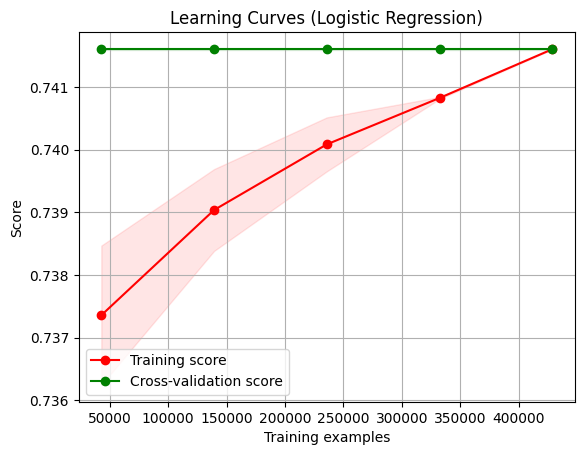

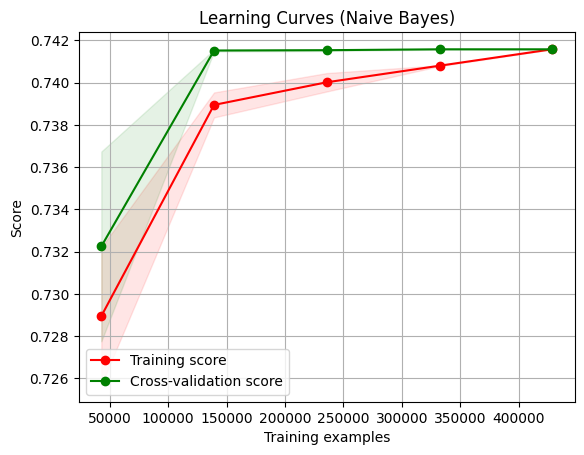

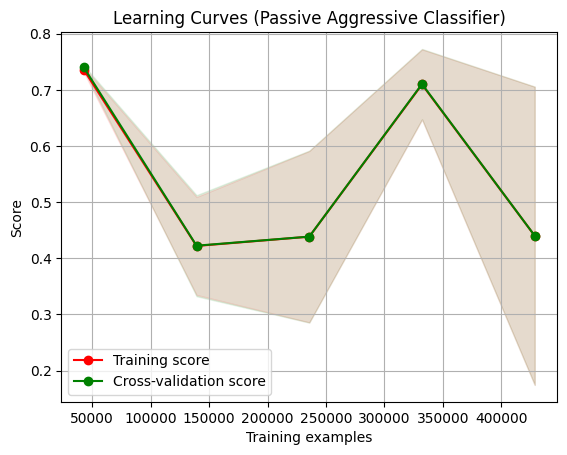

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import SGDClassifier, LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from scipy.special import softmax

def calculate_entropy(password):
    unique_characters = set(password)
    entropy = len(unique_characters) / len(password)
    return entropy

def is_common_password(password, common_passwords_set):
    return password in common_passwords_set

def has_consecutive_recurring_elements(password):
    consecutive_count = 0
    for i in range(len(password) - 1):
        if password[i] == password[i + 1]:
            consecutive_count += 1
    return consecutive_count > 2

def assess_password_strength(password, common_passwords_set):
    entropy = calculate_entropy(password)
    length = len(password)
    common_password = is_common_password(password, common_passwords_set)
    consecutive_recurring = has_consecutive_recurring_elements(password)

    if length >= 12 and entropy > 0.8 and not common_password and not consecutive_recurring:
        strength_class = 2
    elif length >= 8 and entropy > 0.5 and not common_password:
        strength_class = 1
    else:
        strength_class = 0

    return strength_class

common_passwords_set = set(df['password'])

X = df['password'].apply(lambda password: [calculate_entropy(password),
                                           is_common_password(password, common_passwords_set),
                                           has_consecutive_recurring_elements(password)])
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X.tolist(), y, test_size=0.2, random_state=42)

classifiers = {
    'SGD Classifier': SGDClassifier(max_iter=1000, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(random_state=42),
}

results = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    if hasattr(classifier, 'predict_proba'):
        y_score = classifier.predict_proba(X_test)
    else:
        y_score = classifier.decision_function(X_test)
        y_score = softmax(y_score, axis=1)

    roc_auc = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovr')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
    }

for name, metrics in results.items():
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

print("\n")
for name, classifier in classifiers.items():
    title = f"Learning Curves ({name})"
    plot_learning_curve(classifier, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

In [ ]:
def get_user_password():
    user_password = input("Enter a password: ")
    return user_password

user_password = get_user_password()

strength_class = assess_password_strength(user_password, common_passwords_set)

print("\nAssessment Result:")
if strength_class == 2:
    print("Password is Strong")
elif strength_class == 1:
    print("Password is Moderately Strong")
else:
    print("Password is Weak")

Enter a password: 8f2vaMz3nQj,^"=

Assessment Result:
Password is Strong
